<a href="https://colab.research.google.com/github/naomiyjiang/wisd_court_catalysts/blob/main/Foul_Violation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

from google.colab import files
uploaded = files.upload()

Saving g0042100301.csv to g0042100301.csv


In [ ]:
df = pd.read_csv("g0042100301.csv")
df

,game_id,league,period,event_num,clock,description,locX,locY,opt1,opt2,event_action_type,event_type,team_id,offense_team_id,player1_id,player2_id,player3_id,home_score,away_score,order
0,42100301,NBA,1,2,12:00,Start Period,0,-80,0,0,0,12,0,0,0,NaN,NaN,0,0,20000
1,42100301,NBA,1,4,11:57,Jump Ball Williams III vs Adebayo (Williams ga...,0,-80,0,0,0,10,1610612738,1610612738,1629057,1629684.0,1628389.0,0,0,60000
2,42100301,NBA,1,7,11:39,[BOS 3-0] Williams 3pt Shot: Made (3 PTS) Assi...,205,141,3,0,80,1,1610612738,1610612738,1629684,1628369.0,NaN,0,3,70000
3,42100301,NBA,1,9,11:17,[MIA] Tucker Floating Jump shot: Missed,20,103,2,0,78,2,1610612748,1610612748,200782,NaN,NaN,0,3,90000
4,42100301,NBA,1,10,11:14,[BOS] Brown Rebound (Off:0 Def:1),20,103,0,0,0,4,1610612738,1610612748,1627759,NaN,NaN,0,3,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,42100301,NBA,4,673,00:28.1,[BOS] Pritchard 3pt Shot: Missed,-188,189,3,0,79,2,1610612738,1610612738,1630202,NaN,NaN,118,107,6580000
472,42100301,NBA,4,674,00:28.1,[MIA] Strus Rebound (Off:1 Def:3),-188,189,0,0,0,4,1610612748,1610612738,1629622,NaN,NaN,118,107,6590000
473,42100301,NBA,4,675,00:03.3,[MIA] Team Turnover : Shot Clock Turnover,120,57,0,0,11,5,1610612748,1610612748,0,NaN,NaN,118,107,6600000
474,42100301,NBA,4,676,00:00.0,End Period,0,-80,0,0,0,13,0,1610612738,0,NaN,NaN,118,107,6610000


In [ ]:
foul_events = df[df['event_type'] == 6]
foul_events

NameError: ignored

In [ ]:
df['player_name'] = df['description'].str.extract(r'\] (\w+)', expand=False)
grouped_data = foul_events.groupby('player_name')
foul_counts = grouped_data.size().reset_index(name='foul_number').sort_values(by='foul_number', ascending=False)
foul_counts = foul_counts.reset_index(drop=True)
print(foul_counts)


   player_name  foul_number
0     Williams            8
1      Adebayo            4
2       Tucker            4
3      Vincent            4
4        White            4
5        Brown            3
6       Butler            3
7      Nesmith            3
8      Oladipo            3
9        Strus            3
10      Dedmon            2
11   Pritchard            2
12       Theis            2
13       Herro            1
14       Tatum            1


In [ ]:
grouped_foul_events = foul_events.groupby('team_id')
team_id_to_name = {
    1610612738: 'BOS',
    1610612748: 'MIA',
}
foul_events_count_by_team = grouped_foul_events.size().reset_index(name='foul_event_count').replace(team_id_to_name)
print(foul_events_count_by_team)
#细化到 犯规种类

  team_id  foul_event_count
0     BOS                23
1     MIA                25


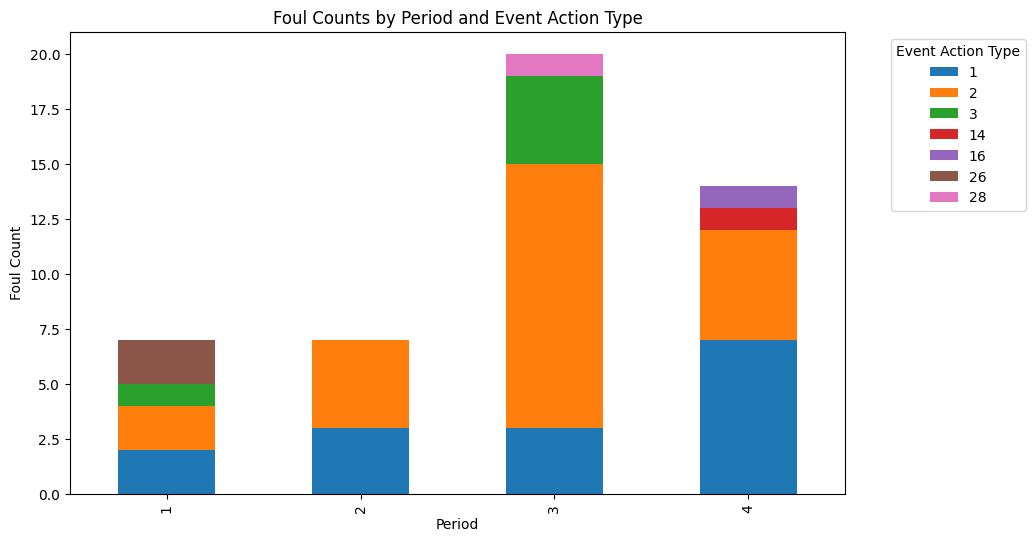

In [ ]:
foul_counts = foul_events.groupby(['period', 'event_action_type']).size().reset_index(name='foul_count')
foul_pivot = foul_counts.pivot(index='period', columns='event_action_type', values='foul_count')
foul_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Period')
plt.ylabel('Foul Count')
plt.title('Foul Counts by Period and Event Action Type')
plt.legend(title='Event Action Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()